In [4]:
import ROOT
from IPython.display import  Audio
sound_file= 'sounds/dscybsit.wav'

Welcome to JupyROOT 6.16/00


In [5]:
file = ROOT.TFile.Open("../output/Charmonium2018B_test/dzero_m21_charmonium_2018B.root")

mass = ROOT.RooRealVar("mass", "", 1.75, 1.96)
data = ROOT.RooDataSet("data", "", file.Dzero, ROOT.RooArgSet(mass))


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Eval -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision


In [6]:
## Signal definition: Gaussian 

frac_signal = ROOT.RooRealVar("frac signal", "", 0.2, 0.0, 1.0)
mean = ROOT.RooRealVar("mean", "", 1.864, 1.830, 1.890)
sigma = ROOT.RooRealVar("sigma", "",  0.011, 0.00001, 0.999)

# pdf
gauss = ROOT.RooGaussian("gauss", "", mass, mean, sigma)

In [7]:
1  frac signal   1.11410e-01   2.00819e-03   6.46375e-05  -8.90173e-01
   2  mean         1.86431e+00   2.18570e-04   4.52472e-04   1.44113e-01
   3  p0           7.82325e+01   8.40863e+00   7.90318e-05   8.98390e-01
   4  p1          -1.49652e+01   4.02316e+00   2.19542e-05  -1.50217e-01
   5  p2          -8.97738e+00   1.90871e+00   9.92365e-06  -8.98948e-02
   6  sigma        1.19525e-02   2.31703e-04   2.16555e-05  -1.35168e+00

SyntaxError: invalid syntax (<ipython-input-7-50a325eac882>, line 1)

In [8]:
## Background definition: Third degree polynomial (p0 x³ + p1 x² + p2 x + 1)

#yield_back = ROOT.RooRealVar("yield background", "", 1e5, 0, 1.5e5)
p0 = ROOT.RooRealVar("p0", "", 78, 50, 100)
p1 = ROOT.RooRealVar("p1", "", -15, -20, -10)
p2 = ROOT.RooRealVar("p2", "",  -9, -15, -5)


back = ROOT.RooPolynomial("Third degree polynomial", "", mass, ROOT.RooArgList(p0, p1, p2))

In [9]:
# Model definition and fitting
model = ROOT.RooAddPdf("model", "", ROOT.RooArgList(gauss, back),
                       ROOT.RooArgList(frac_signal), ROOT.kTRUE)


In [10]:
result = model.fitTo(data, ROOT.RooFit.Save())

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (gauss,Third degree polynomial)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 frac signal   2.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 mean         1.86400e+00  6.00000e-03    1.83000e+00  1.89000e+00
     3 p0           7.80000e+01  5.00000e+00    5.00000e+01  1.00000e+02
     4 p1          -1.50000e+01  1.00000e+00   -2.00000e+01 -1.00000e+01
     5 p2          -9.00000e+00  1.00000e+00   -1.50000e+01 -5.00000e+00
     6 sigma        1.10000e-02  5.49500e-03    1.00000e-05  9.99000e-01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 N

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (gauss)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (Third degree polynomial)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


Info in <TCanvas::Print>: png file Dzero_fit.png has been created


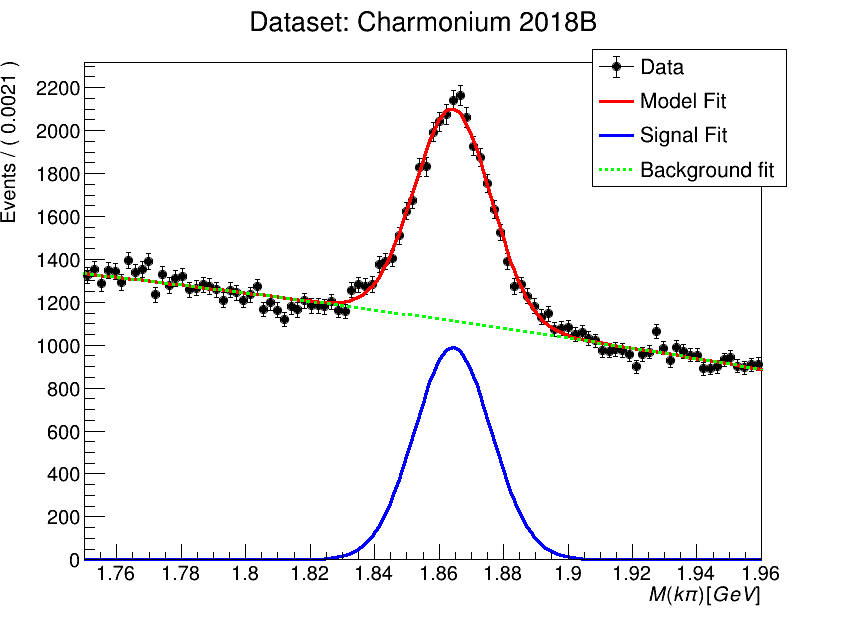

In [11]:
# Colors and styles
colors = {"model" : 2, "signal" : 4, "background" : 3}
styles = {"model" : 1, "signal" : 1, "background" : 2}

can = ROOT.TCanvas("can", "histograms", 850, 650)

# Frame creation
frame = mass.frame(ROOT.RooFit.Title("Dataset: Charmonium 2018B"))
frame.GetXaxis().SetTitle("M(k\pi) [GeV]")
## Plots

# Data
data.plotOn(frame, ROOT.RooFit.Name("Data"), ROOT.RooFit.DataError(ROOT.RooAbsData.SumW2))

# Model
model.plotOn(frame, ROOT.RooFit.Name("Model"), ROOT.RooFit.LineStyle(styles["model"]), ROOT.RooFit.LineColor(colors["model"]))

# Signal
model.plotOn(frame, ROOT.RooFit.Name("Signal"), ROOT.RooFit.Components("gauss"), ROOT.RooFit.LineStyle(styles["signal"]), ROOT.RooFit.LineColor(colors["signal"]))

# Background
model.plotOn(frame, ROOT.RooFit.Name("Background"), ROOT.RooFit.Components("Third degree polynomial"), ROOT.RooFit.LineStyle(styles["background"]), ROOT.RooFit.LineColor(colors["background"]))

## Legends

leg = ROOT.TLegend(0.7, 0.7, 0.93, 0.92)
leg.AddEntry(frame.findObject("Data"), "Data", "LEP")
leg.AddEntry(frame.findObject("Model"), "Model Fit", "L")
leg.AddEntry(frame.findObject("Signal"), "Signal Fit", "L")
leg.AddEntry(frame.findObject("Background"), "Background fit", "L")

frame.Draw()
leg.Draw("same")

can.Draw()

can.SaveAs("Dzero_fit.png")

In [12]:
Audio(sound_file, autoplay=True)